In [28]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

In [4]:
def get_ts(tag):
    ts = []
    timedir = 'results/times/'
    
    fn = timedir+'timekd_{}.txt'.format(tag)
    n, tb, to, tp = np.loadtxt(fn, delimiter=',',unpack=True)
    ts.append([n,tb,to,'c bounded'])
    ts.append([n,tb,tp,'c periodic'])
    
    fn = timedir+'timekd_{}_scipyorig2.txt'.format(tag)
    n, tb, to = np.loadtxt(fn, delimiter=',',unpack=True)
    ts.append([n,tb,to,'scipy bounded'])
    
    fn = timedir+'timekd_{}_scipyperiodic2.txt'.format(tag)
    n, tb, tp = np.loadtxt(fn, delimiter=',',unpack=True)
    ts.append([n,tb,tp,'scipy periodic'])
    
    fn = timedir+'timekd_{}_mock.txt'.format(tag)
    n, tb, to, tp = np.loadtxt(fn, delimiter=',',unpack=True)
    ts.append([n,tb,to,'mock bounded'])
    ts.append([n,tb,tp,'mock periodic'])
    
    return ts

In [12]:
def plot(title):
    plt.figure()
    if "Corner" in title:
        ts = get_ts("corner")
    elif "Center" in title:
        ts = get_ts("center")
    else:
        print "Error!"
        exit(1)
    for tt in ts:
        n,tb,t,label=tt
        if label.startswith('scipy'):
            color = 'red'
        elif label.startswith('c'):
            color = 'blue'
        elif label.startswith('mock'):
            color = 'magenta'
        if 'periodic' in label:
            ls = '-'
            marker = 'x'
        elif 'bounded' in label:
            ls = '--'
            marker = '+'
        if "query" in title:
            tplot = t
        elif "build" in title:
            tplot = tb
        else:
            print "Error!"
            exit(1)
        plt.loglog(n,tplot/1000.0,label=label,color=color,ls=ls,marker=marker)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel('time (s/1000 queries)')
    plt.ylim(1e-3)
    plt.title(title)

### KDTree speed tests

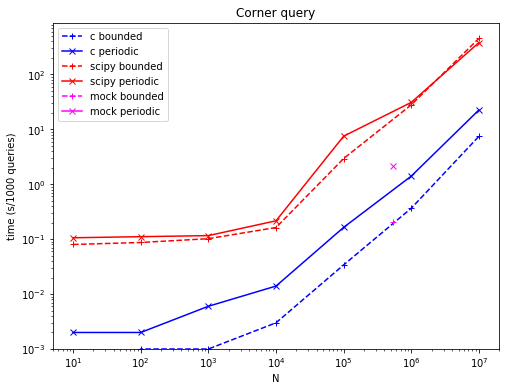

In [13]:
plot("Corner query")

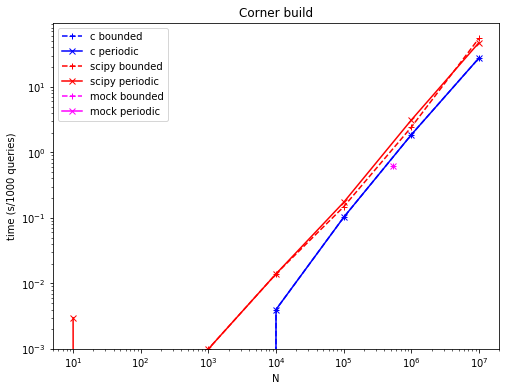

In [14]:
plot("Corner build")

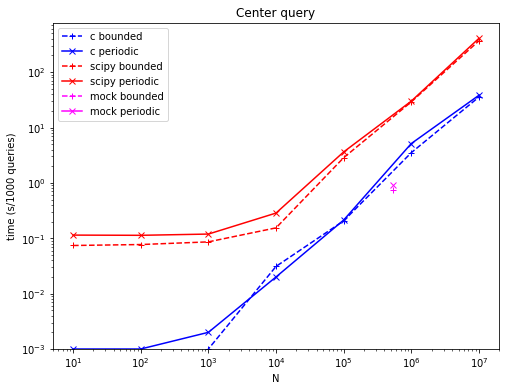

In [15]:
plot("Center query")

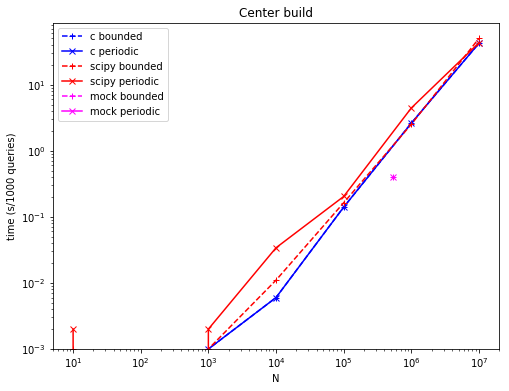

In [16]:
plot("Center build")

### Void probability functions

Text(0,0.5,u'P$_v$(r)')

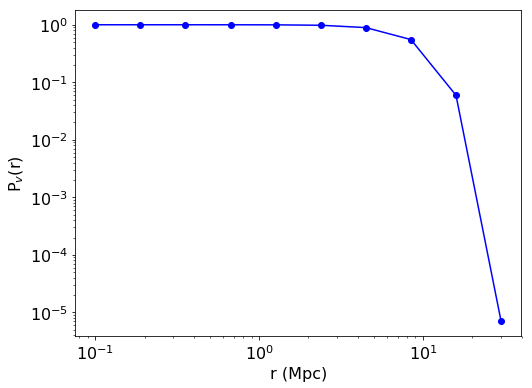

In [30]:
plt.figure()    
fn = 'results/upf_log.txt'
n, p = np.loadtxt(fn, delimiter=',',unpack=True)
plt.loglog(n, p, marker='o', color='blue')
plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?
plt.ylabel(r"P$_v$(r)")

Text(0,0.5,u'P$_v$(r)')

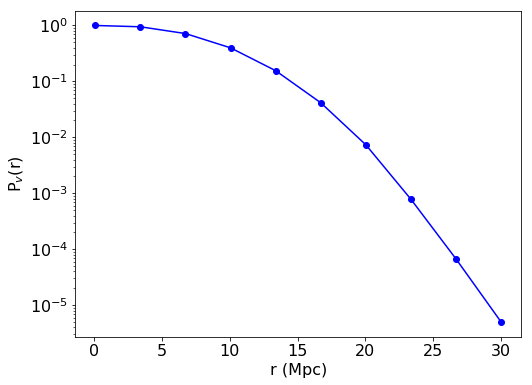

In [33]:
plt.figure()    
fn = 'results/vpf.txt'
n, p = np.loadtxt(fn, delimiter=',',unpack=True)
plt.semilogy(n, p, marker='o', color='blue')
plt.xlabel("r (Mpc)") #is it? are positions in Mpc? not h?
plt.ylabel(r"P$_v$(r)")